In [1]:
#step1 import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#step2:Load the csv file

In [4]:
from google.colab import files
uploaded = files.upload()

Saving five_cities_aqi_with_proportions.csv to five_cities_aqi_with_proportions (1).csv


In [5]:
df = pd.read_csv('five_cities_aqi_with_proportions.csv')

In [6]:
# Step 3: Convert 'Date' to datetime


In [7]:

df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
#check and handle of missing values

In [8]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
city        0
date        0
pm2_5       0
pm10        0
no2         0
so2         0
co          0
o3          0
aqi         0
category    0
dtype: int64


In [9]:
# Fill missing values using forward fill
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-9-465619885.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [10]:
#step5: calculate aqi

In [11]:
print(df.columns)
df.columns = df.columns.str.strip()  # remove extra spaces


Index(['city', 'date', 'pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'aqi',
       'category'],
      dtype='object')


In [12]:
# Step 6: Optional – Add AQI Category (Based on CPCB India standards – simplified)

In [13]:
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']
df['AQI'] = df[pollutants].mean(axis=1)


In [14]:
def get_aqi_category(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(get_aqi_category)


In [15]:
#step: Plot AQI over time

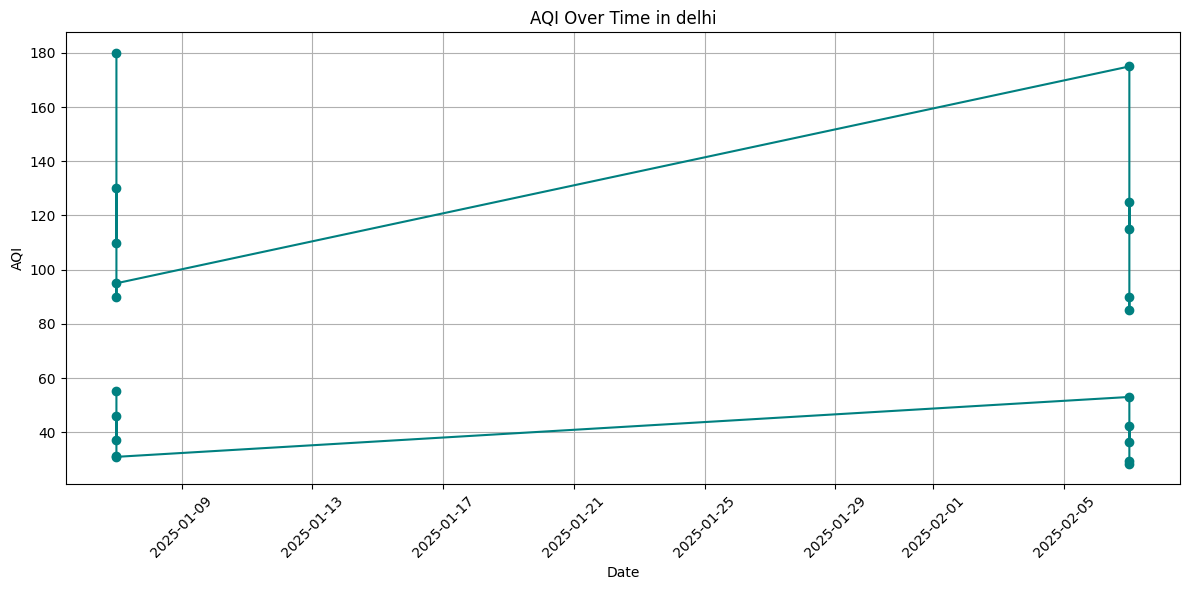

In [16]:
# Clean column names to avoid KeyError
df.columns = df.columns.str.strip().str.lower()

# Plot AQI over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['aqi'], marker='o', color='teal')
plt.title('AQI Over Time in delhi')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#step:8 plot heatmap for pollutant correlation

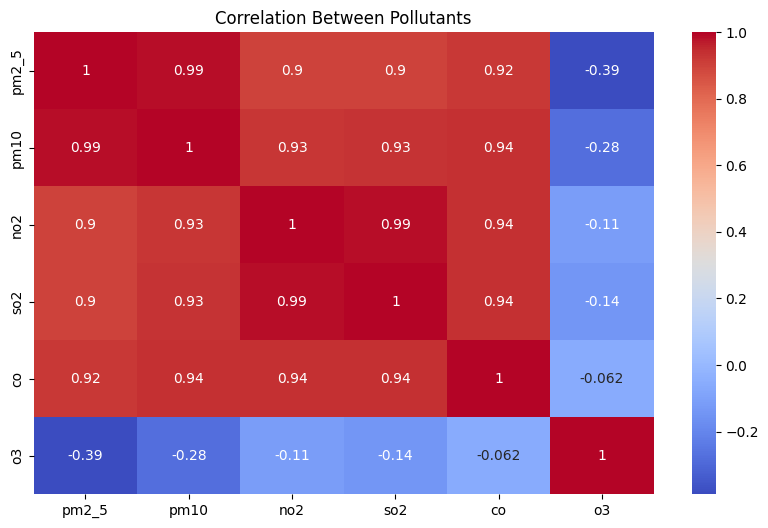

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants')
plt.show()

In [19]:
#Display the final data frame

In [20]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Print selected columns
print(df[['date', 'city', 'aqi', 'aqi_category']])



        date       city  aqi        aqi  aqi_category
0 2025-01-07      Delhi  180  55.200000  Satisfactory
1 2025-01-07     Mumbai  110  37.133333          Good
2 2025-01-07       Pune  130  45.850000          Good
3 2025-01-07    Chennai   90  31.100000          Good
4 2025-01-07  Bangalore   95  30.950000          Good
5 2025-02-07      Delhi  175  53.050000  Satisfactory
6 2025-02-07     Mumbai  115  36.316667          Good
7 2025-02-07       Pune  125  42.333333          Good
8 2025-02-07    Chennai   85  28.416667          Good
9 2025-02-07  Bangalore   90  29.433333          Good


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import joblib

In [22]:
# Upload your CSV file to Colab (Click Files → Upload)
df = pd.read_csv('five_cities_aqi_with_proportions.csv')  # Replace with your file name

# Show first few rows
df.head()

,city,date,pm2_5,pm10,no2,so2,co,o3,aqi,category
0,Delhi,2025-07-01,90,160,45,10,1.2,25,180,Moderate
1,Mumbai,2025-07-01,45,95,35,7,0.8,40,110,Satisfactory
2,Pune,2025-07-01,55,120,40,9,1.1,50,130,Moderate
3,Chennai,2025-07-01,35,80,30,6,0.6,35,90,Satisfactory
4,Bangalore,2025-07-01,40,85,25,5,0.7,30,95,Satisfactory


In [23]:
# Clean column names

df.columns = df.columns.str.strip()  # Remove spaces
print("Available Columns:", df.columns)


Available Columns: Index(['city', 'date', 'pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3', 'aqi',
       'category'],
      dtype='object')


In [24]:
#Train model using all rows
model = LinearRegression()
model.fit(df[['pm2_5', 'pm10', 'no2', 'so2', 'co', 'o3']], df['aqi'])

#  Save the trained model
joblib.dump(model, 'model.pkl')
print(" Model trained and saved as model.pkl")

 Model trained and saved as model.pkl


In [25]:
#Load the model
model = joblib.load('model.pkl')


In [26]:
# Fast & direct values — replace as needed
date = "14-07-2025"
city = "Nanded"
no2 = 60.0      # replace as needed
pm25 = 110.0    # replace as needed
co = 1.8        # replace as needed


In [27]:
#  Predict AQI
pm25 = 85
pm10 = 120
no2 = 45
so2 = 15
co = 1.2
o3 = 35


In [28]:
features = np.array([[pm25, pm10, no2, so2, co, o3]])
aqi_prediction = model.predict(features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# AQI Category function
def get_aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

category = get_aqi_category(aqi_prediction[0])

In [30]:
print("\n AQI Prediction Result")
print(" Date:", date)
print(" City:", city)
print(" PM2.5:", pm25)
print(" PM10:", pm10)
print(" NO2:", no2)
print(" SO2:", so2)
print(" CO:", co)
print(" O3:", o3)



 AQI Prediction Result
 Date: 14-07-2025
 City: Nanded
 PM2.5: 85
 PM10: 120
 NO2: 45
 SO2: 15
 CO: 1.2
 O3: 35


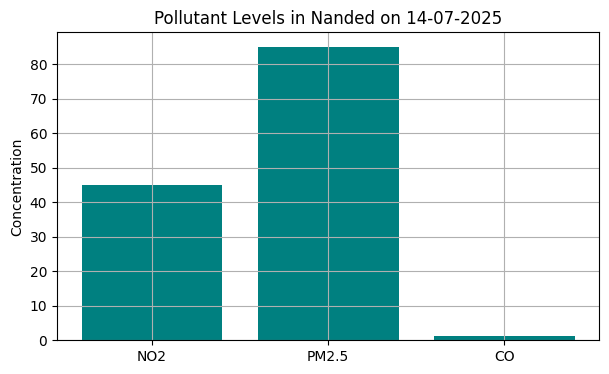

In [31]:
#  Bar chart of pollutant levels
plt.figure(figsize=(7, 4))
pollutants = ['NO2', 'PM2.5', 'CO']
values = [no2, pm25, co]
plt.bar(pollutants, values, color='teal')
plt.title(f"Pollutant Levels in {city} on {date}")
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
